# Data 1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import pandas as pd
import numpy as np
!pip install mne
import mne
import os


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: C:\Users\sinha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_csv('./OpenBCI-RAW-2024-03-14_19-45-10 (1).txt', delimiter = ',', skiprows=5)
data = df.to_numpy()

In [5]:
sfreq = 250  # sample rate in Hz
data = np.delete(data, [12, 19, 20, 21, 23], axis=1) # IMPORTANT - CHANGE THIS FOR EVERY DATA READING
#print(data[5, :-24])
data = data[:, :-1] # removes timestamp
ch_names = ['Channel {}'.format(i) for i in range(data.shape[1])]
ch_types = ['eeg' for i in range(data.shape[1])]

In [6]:
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(data.T, info)

Creating RawArray with float64 data, n_channels=19, n_times=136218
    Range : 0 ... 136217 =      0.000 ...   544.868 secs
Ready.


<Info | 7 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, Channel 5, Channel ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
[[ 18172.92936718  18180.64071901  18186.65333827 ...  35940.28633121
   35962.81688962  35978.06077934]
 [-25010.01507163 -25003.93539714 -24992.71482142 ...  -1839.28034774
   -1833.20067325  -1831.09960927]
 [  9681.74751779   9689.86120103   9697.77371857 ...  34932.04384232
   34936.60359819  34944.02437735]
 ...
 [ 29825.31843487  29842.14929845  29850.30768517 ...  42553.56401844
   42570.26077154  42590.93613517]
 [ 39760.82530747  39770.86124073  39777.834985   ...  47348.54964597
   47364.86641942  47381.2502481 ]
 [ 39270.24922016  39292.17628147  39301.31814496 ...  47822.47368365
   47846.32299499  47873.16744008]]
Effective window size : 8.192 (s)


C:\Users\sinha\AppData\Local\Temp\ipykernel_25256\73981447.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


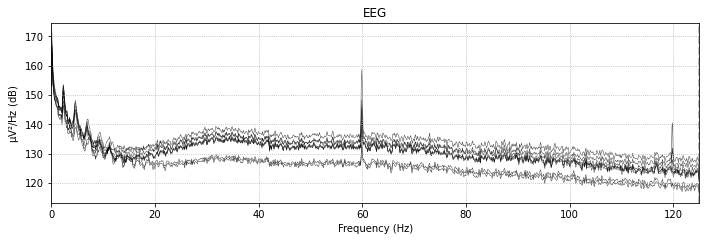

Using matplotlib as 2D backend.
Opening raw-browser...


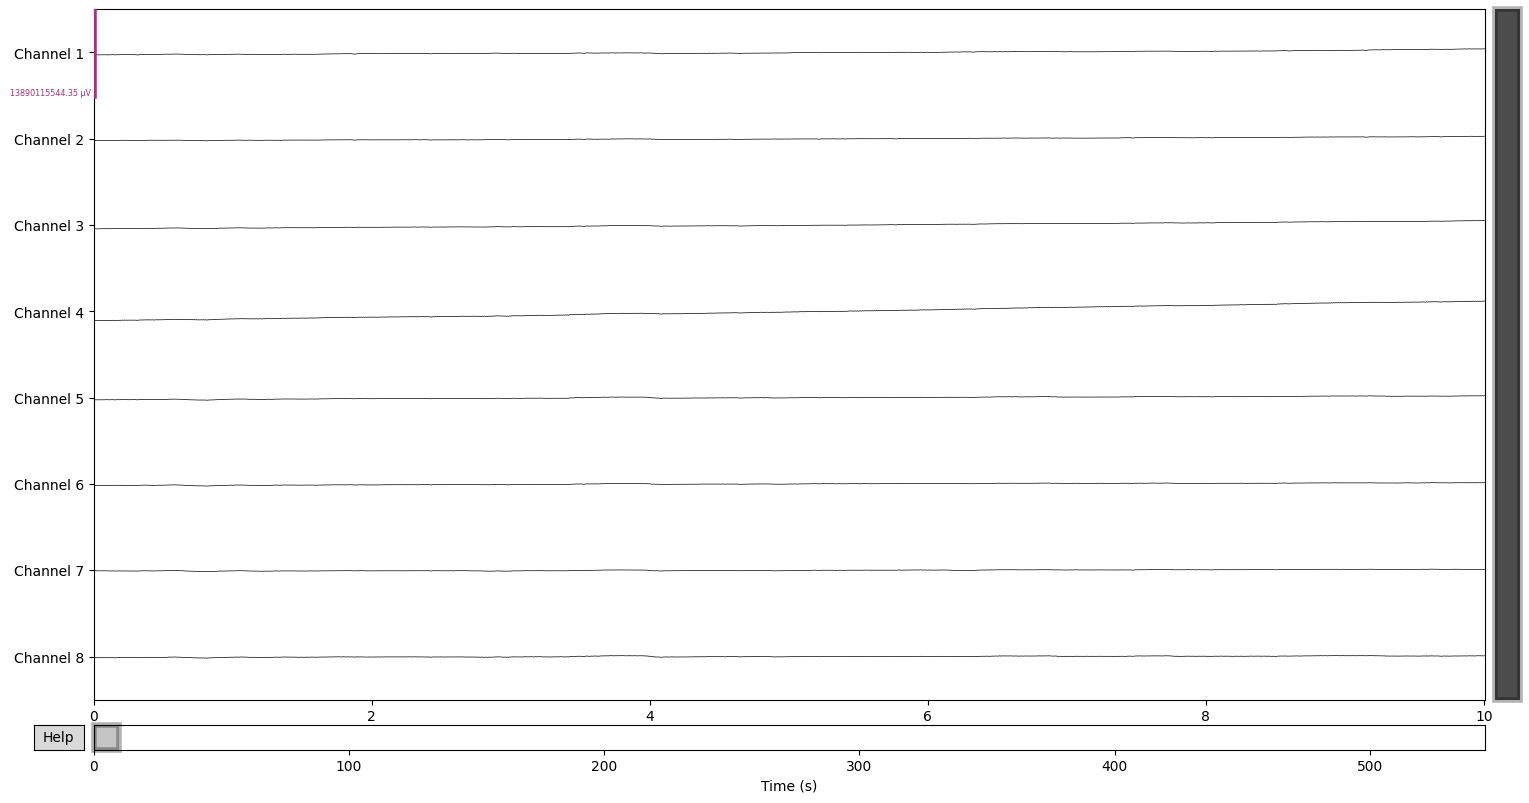

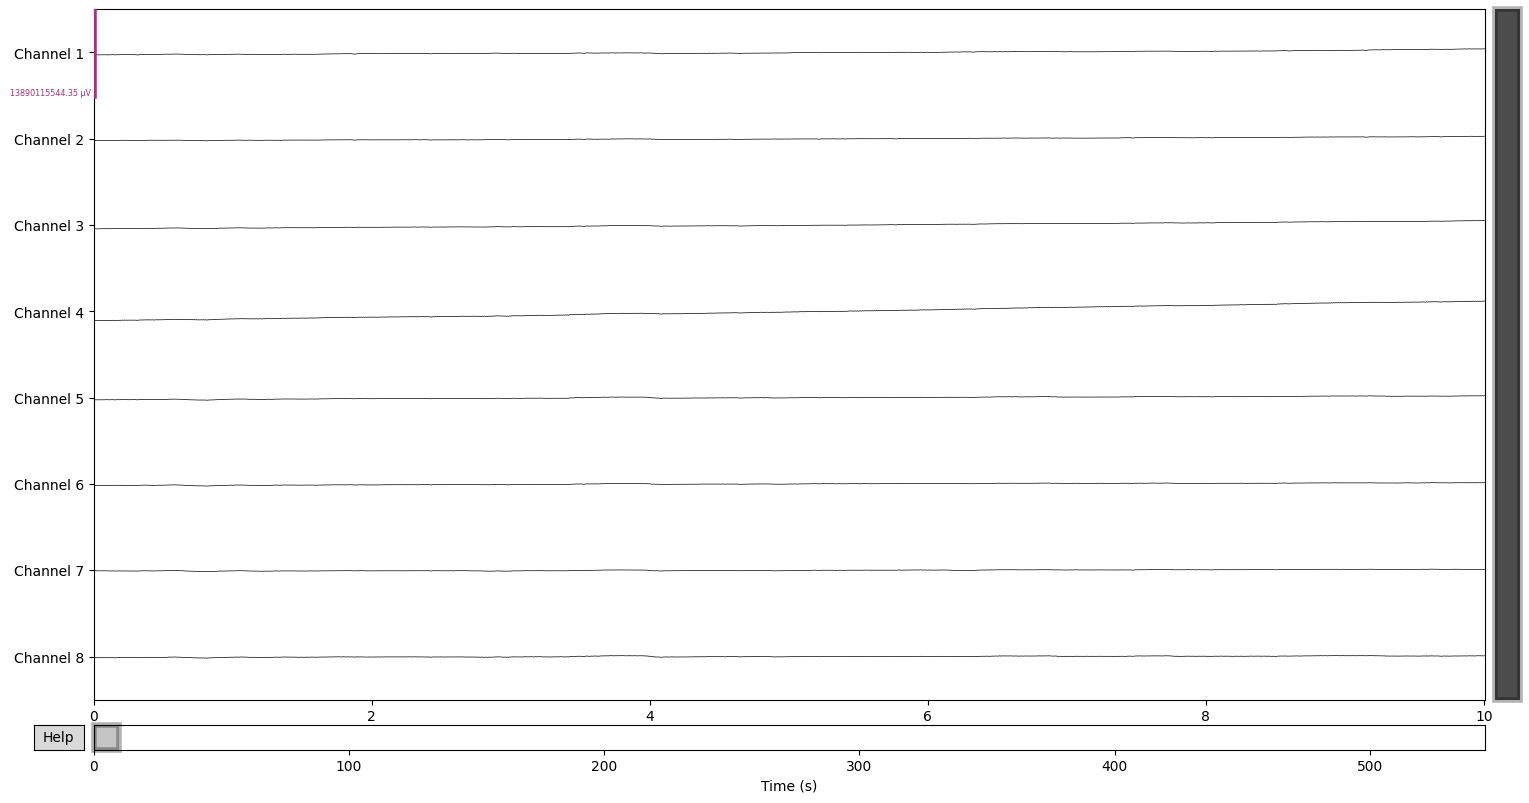

In [7]:
ch_names = [raw.ch_names]
ch_names_to_keep = [ch_names[0][1:9]]
raw = raw.pick_channels(ch_names_to_keep[0])
# Now you can work with the MNE Raw object
print(raw.info)
print(raw.get_data())
raw.plot_psd()
raw.plot(scalings='auto')

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 

C:\Users\sinha\AppData\Local\Temp\ipykernel_25256\2985549974.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


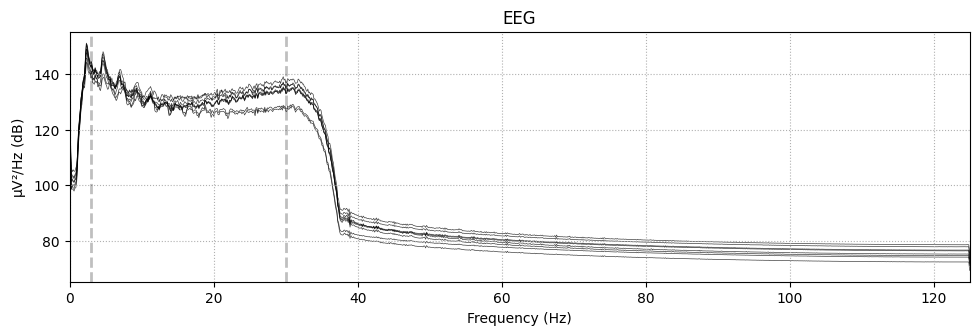

Opening raw-browser...


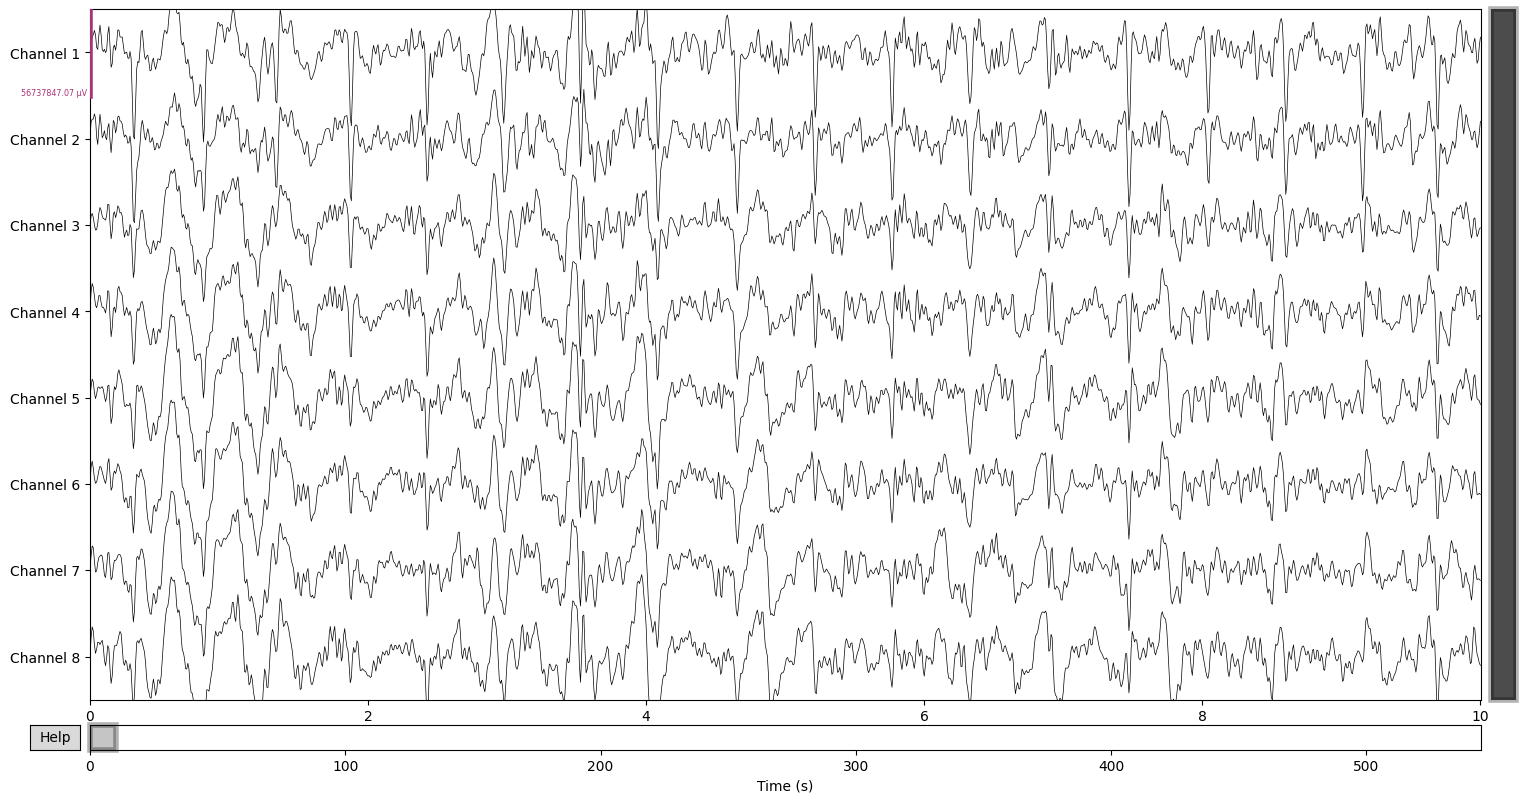

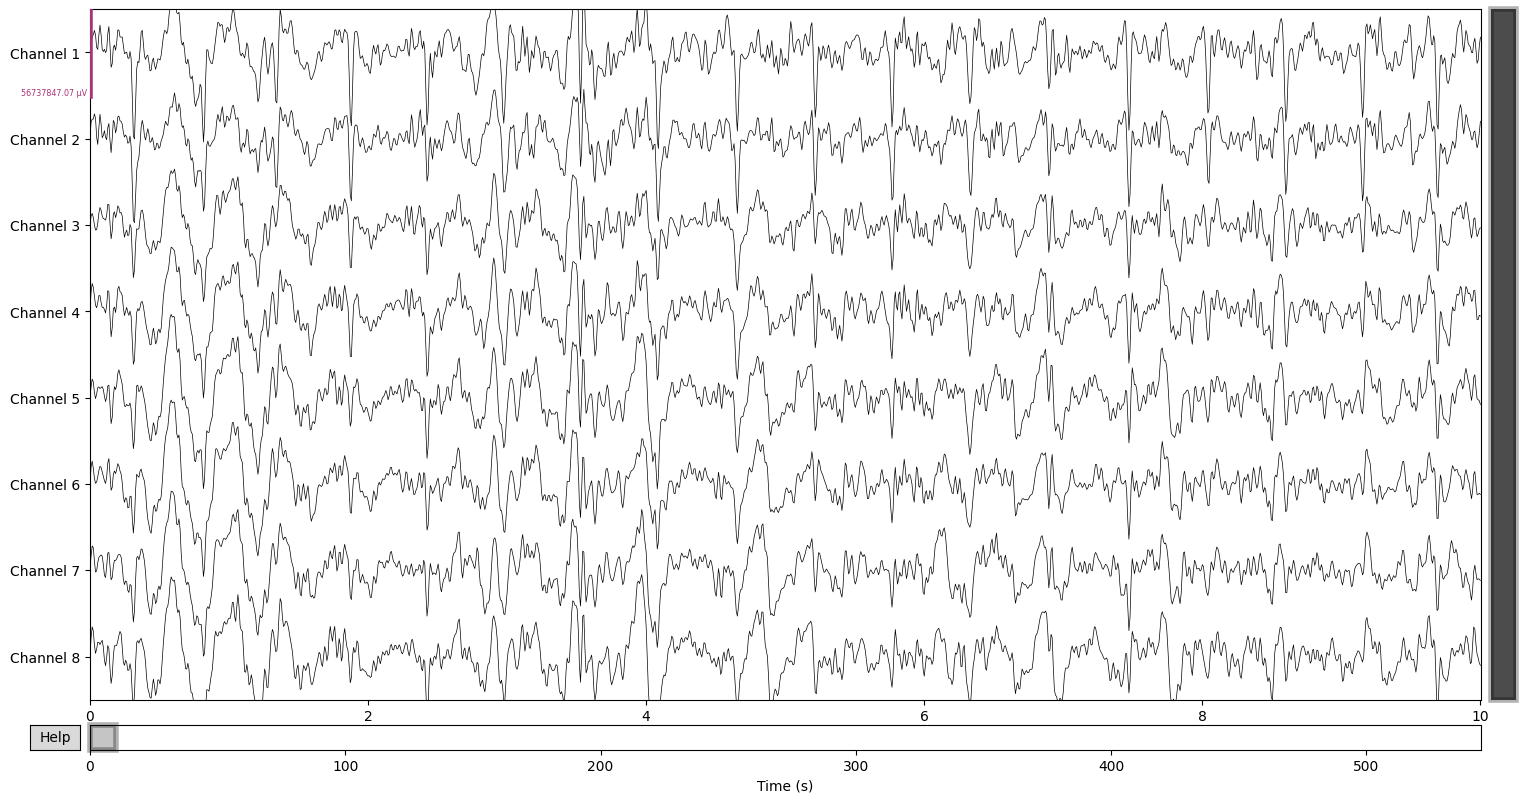

In [8]:
# Time to start filtering
# 60hz electrical filter
raw.notch_filter(60)

# Research said filter to alpha/beta waves
raw.filter(l_freq=3, h_freq=30)
raw.plot_psd()
raw.plot(scalings='auto')

In [9]:
filteredData = raw._data
num_samples = len(filteredData[0])
filteredData = np.append(filteredData, np.zeros([1, num_samples]), 0)
#print(filteredData[8])

# mark samples
list_of_times = [[25, 55], [71, 100], [116, 146], [165, 194], [210, 240], [256, 285], [302, 332], [347, 377], [392, 423], [438, 468], [485, 515]]
for interval in list_of_times:
  interval[0] *= sfreq
  interval[1] *= sfreq
for interval in list_of_times:
  for i in range(interval[0], interval[1]):
    filteredData[8, i] = 1

# Data 2

In [14]:
df_2 = pd.read_csv('./OpenBCI-RAW-2024-03-14_19-45-10 (1).txt', delimiter = ',', skiprows=5)
data_2 = df_2.to_numpy()

In [15]:
data_2 = np.delete(data_2, [12, 19, 20, 21, 23], axis=1) # IMPORTANT - CHANGE THIS FOR EVERY DATA READING
print(data_2[2, :-24])
data_2 = data_2[:, :-1] # removes timestamp
ch_names_2 = ['Channel {}'.format(i) for i in range(data_2.shape[1])]
ch_types_2 = ['eeg' for i in range(data_2.shape[1])]

[]


In [16]:
info_2 = mne.create_info(ch_names=ch_names_2, sfreq=sfreq, ch_types=ch_types_2)
raw_2 = mne.io.RawArray(data_2.T, info_2)

Creating RawArray with float64 data, n_channels=19, n_times=136218
    Range : 0 ... 136217 =      0.000 ...   544.868 secs
Ready.


<Info | 7 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, Channel 5, Channel ...
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>
[[ 18172.92936718  18180.64071901  18186.65333827 ...  35940.28633121
   35962.81688962  35978.06077934]
 [-25010.01507163 -25003.93539714 -24992.71482142 ...  -1839.28034774
   -1833.20067325  -1831.09960927]
 [  9681.74751779   9689.86120103   9697.77371857 ...  34932.04384232
   34936.60359819  34944.02437735]
 ...
 [ 29825.31843487  29842.14929845  29850.30768517 ...  42553.56401844
   42570.26077154  42590.93613517]
 [ 39760.82530747  39770.86124073  39777.834985   ...  47348.54964597
   47364.86641942  47381.2502481 ]
 [ 39270.24922016  39292.17628147  39301.31814496 ...  47822.47368365
   47846.32299499  47873.16744008]]
Effective window size : 8.192 (s)


C:\Users\sinha\AppData\Local\Temp\ipykernel_25256\1061473690.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_2.plot_psd()


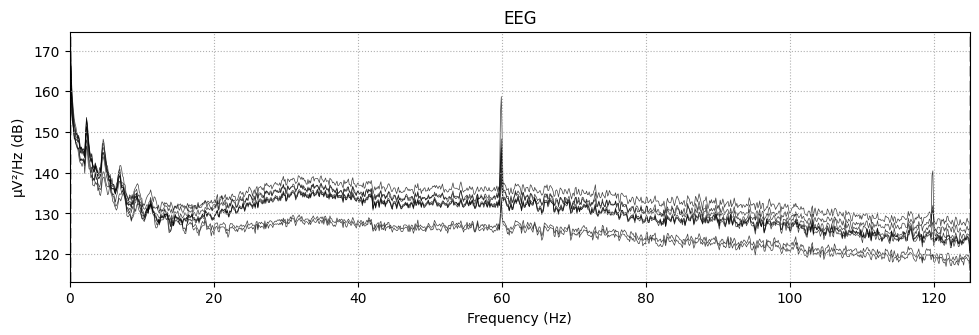

Opening raw-browser...


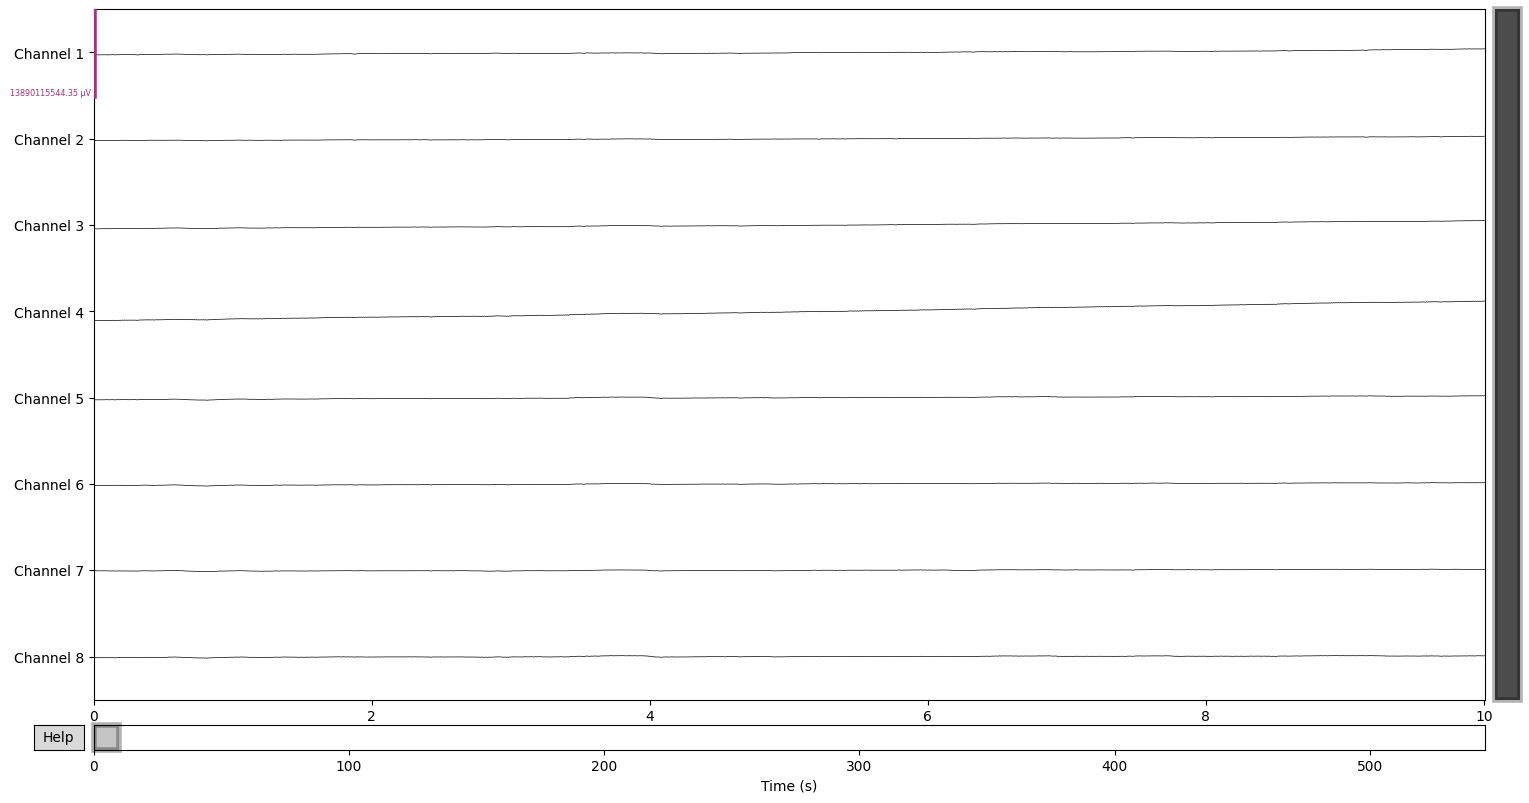

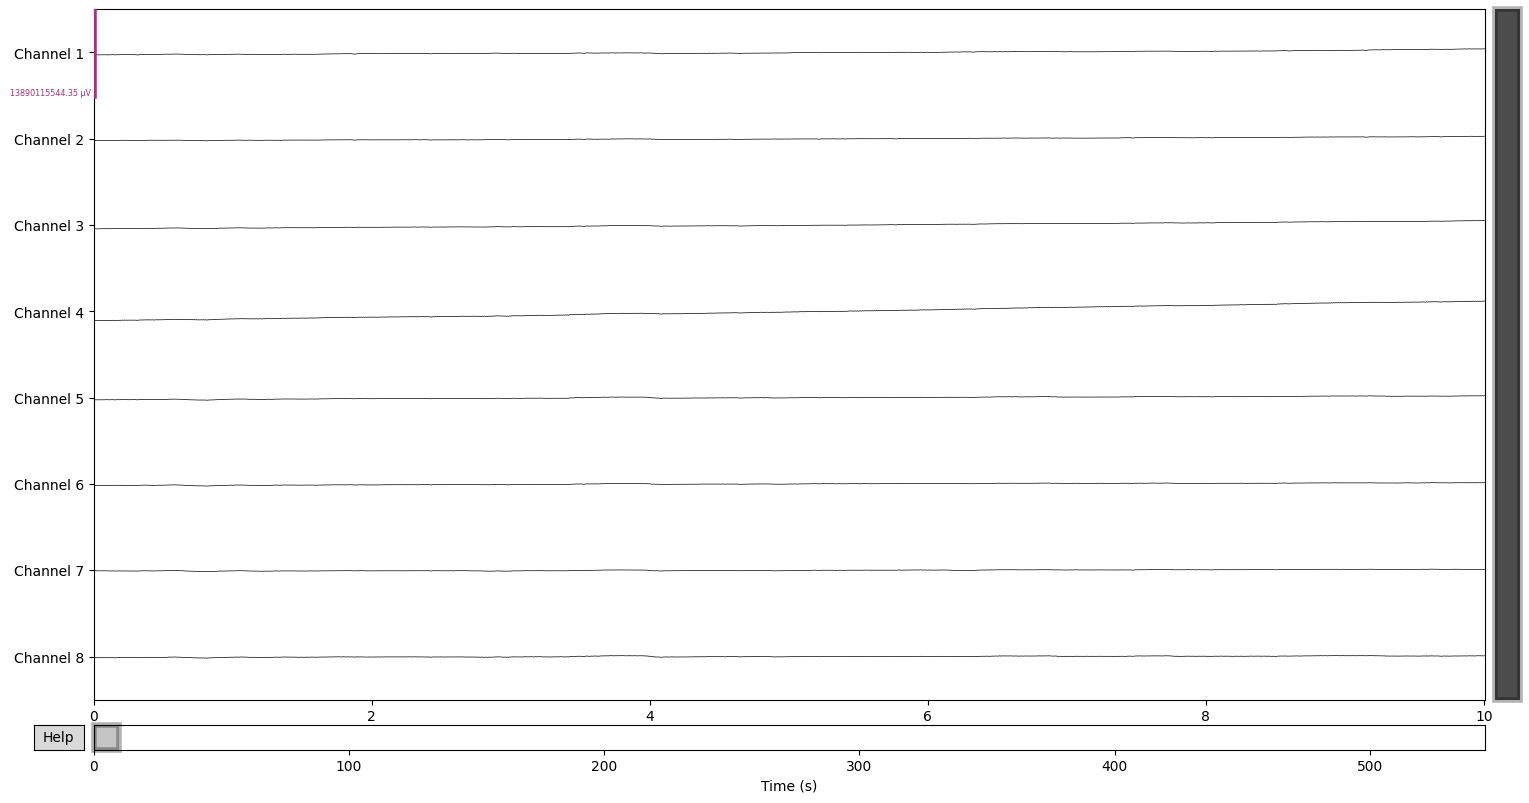

In [17]:
ch_names_2 = [raw_2.ch_names]
ch_names_to_keep_2 = [ch_names_2[0][1:9]]
raw_2 = raw_2.pick_channels(ch_names_to_keep_2[0])
# Now you can work with the MNE Raw object
print(raw_2.info)
print(raw_2.get_data())
raw_2.plot_psd()
raw_2.plot(scalings='auto')

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 3 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 3.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 2.00 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 

C:\Users\sinha\AppData\Local\Temp\ipykernel_25256\4292741575.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_2.plot_psd()


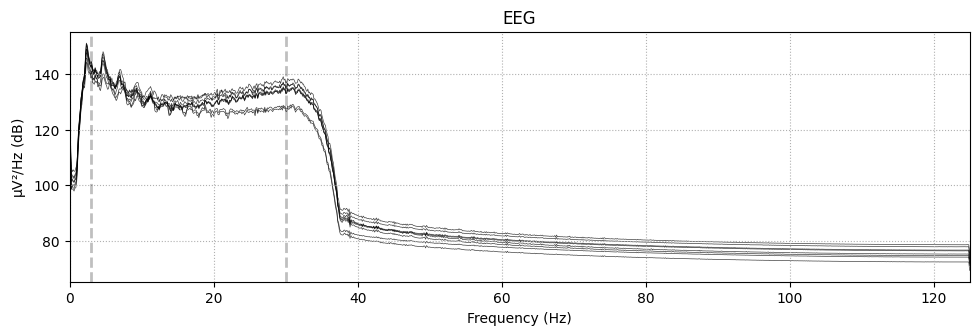

Opening raw-browser...


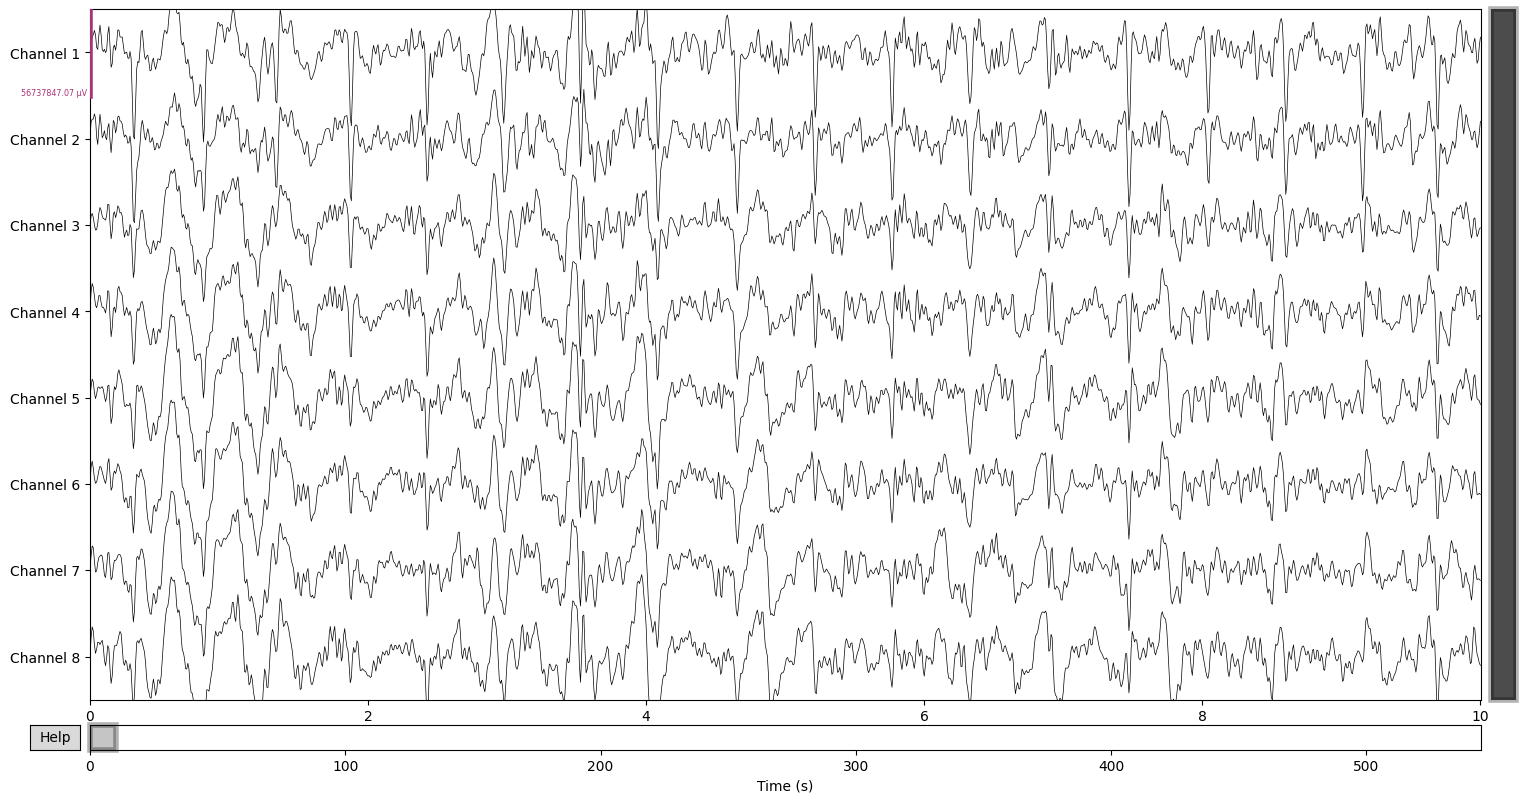

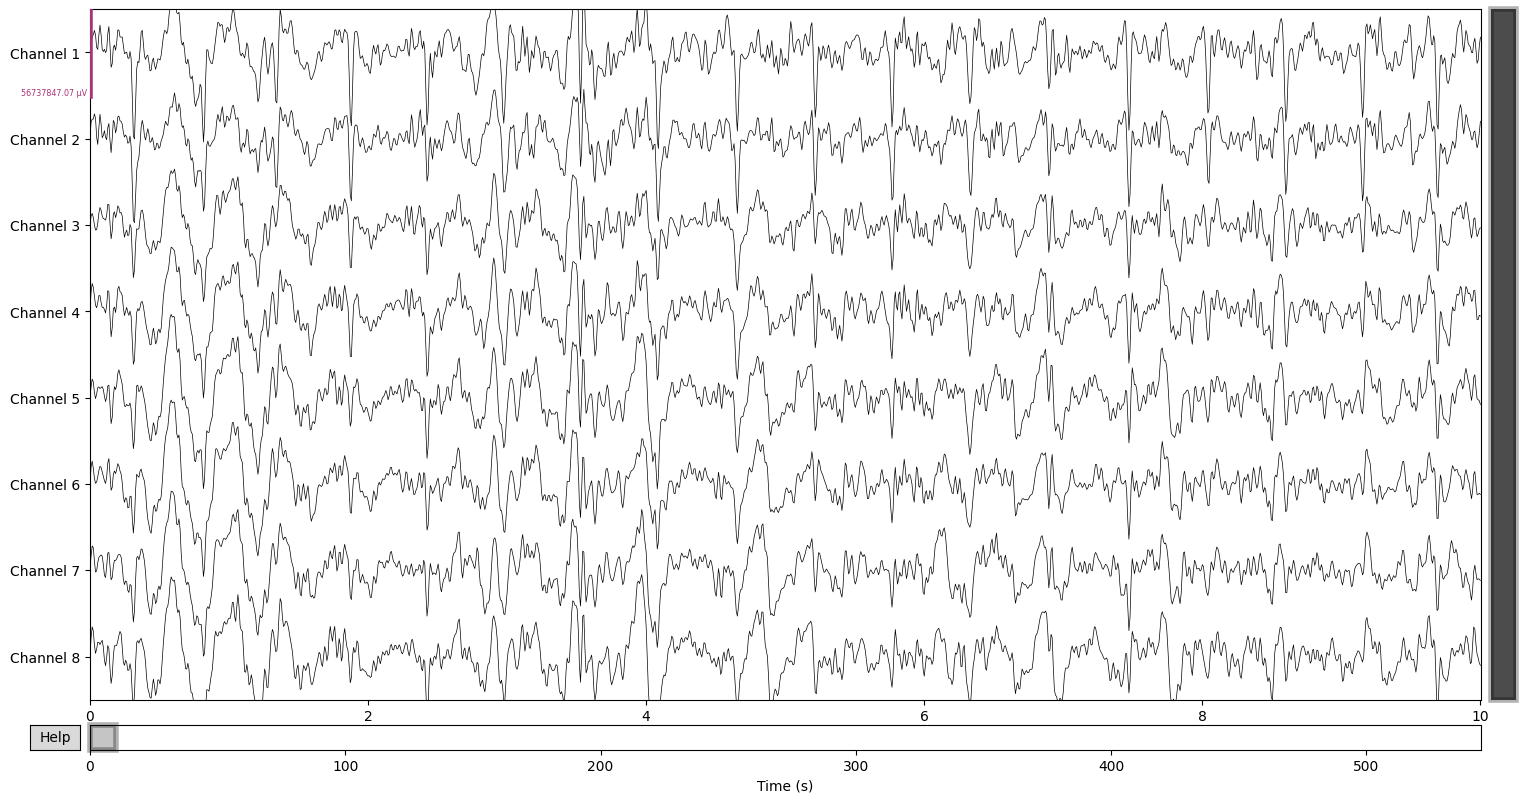

In [18]:
# Time to start filtering
# 60hz electrical filter
raw_2.notch_filter(60)

# Research said filter to alpha/beta waves
raw_2.filter(l_freq=3, h_freq=30)
raw_2.plot_psd()
raw_2.plot(scalings='auto')

In [20]:
filteredData_2 = raw_2._data
num_samples_2 = len(filteredData_2[0])
filteredData_2 = np.append(filteredData_2, np.zeros([1, num_samples_2]), 0)
#print(filteredData[8])

# mark samples
list_of_times_2 = [[7, 37], [52, 82], [113, 126], [142, 172], [188, 217], [232, 262], [277, 307], [322, 352], [367, 397], [412, 442], [648, 678], [693, 722], [738, 767], [782, 812], [828, 857], [872, 902], [918, 947], [962, 992], [1008, 1037], [1052, 1082]]
for interval in list_of_times_2:
  interval[0] *= sfreq
  interval[1] *= sfreq
for interval in list_of_times_2:
  for i in range(interval[0], interval[1]):
    try:
      filteredData_2[8, i] = 1
    except:
      continue

# awesome data training part (very cool)

In [ ]:
# # Import train_test_split function
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler

# # filteredData_2_trim = [[],[],[],[],[],[],[],[],[]]

# # for i in range(0,9):
# #   filteredData_2_trim[i] = filteredData_2[i][0:2000]

# # filteredData_2 = filteredData_2_trim

# trainingData = [[],[],[],[],[],[],[],[],[]]

# for i in range(0,9):
#   trainingData[i] = list(filteredData[i]) + list(filteredData_2[i])

# #trainingData = filteredData_2

# x = np.array([trainingData[0], trainingData[1], trainingData[2], trainingData[3], trainingData[4], trainingData[5], trainingData[6], trainingData[7]])
# x = x.transpose()
# y = np.array(trainingData[8])

# # Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109) # 70% training and 30% test

# #scaler = StandardScaler()
# scaler = RobustScaler()
# X_train_scale = scaler.fit_transform(X_train)
# X_test_scale = scaler.transform(X_test)

# X_train_scale.mean(axis=0)
# #X_train_scale.std(axis=0)

array([-0.07192949, -0.06740022, -0.08115004, -0.07412222, -0.07463722,
       -0.06420321, -0.06611161, -0.06141125])

In [ ]:
# #Import svm model
# from sklearn import svm
# from sklearn import linear_model

# #Create a svm Classifier
# #classifier = svm.SVC(kernel='linear')
# #classifier = svm.LinearSVC(dual=False)
# classifier = linear_model.SGDClassifier(loss='hinge')

# #Train the model using the training sets
# classifier.fit(X_train_scale, y_train)

# #Predict the response for test dataset
# y_pred = classifier.predict(X_test_scale)

In [ ]:
# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.549932633150983


In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Data preparation
trainingData = [[],[],[],[],[],[],[],[],[]]

for i in range(0, 9):
    trainingData[i] = list(filteredData[i]) + list(filteredData_2[i])

x = np.array([trainingData[0], trainingData[1], trainingData[2], trainingData[3], trainingData[4], trainingData[5], trainingData[6], trainingData[7]])
x = x.transpose()
y = np.array(trainingData[8])

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=109)

# Handle imbalanced data using SMOTE
sm = SMOTE(random_state=109)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test_scale = scaler.transform(X_test)

# Define the model and hyperparameters
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid search for best parameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_res, y_train_res)

# Best model
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(X_train_res, y_train_res)

# Predict and evaluate
y_pred = best_model.predict(X_test_scale)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


KeyboardInterrupt: 

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Data preparation
trainingData = [[], [], [], [], [], [], [], [], []]

for i in range(0, 9):
    trainingData[i] = list(filteredData[i]) + list(filteredData_2[i])

x = np.array([trainingData[0], trainingData[1], trainingData[2], trainingData[3], trainingData[4], trainingData[5], trainingData[6], trainingData[7]])
x = x.transpose()
y = np.array(trainingData[8])

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=109)

# Handle imbalanced data using SMOTE
sm = SMOTE(random_state=109)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test_scale = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_res = torch.tensor(X_train_res, dtype=torch.float32).cuda()
y_train_res = torch.tensor(y_train_res, dtype=torch.long).cuda()
X_test_scale = torch.tensor(X_test_scale, dtype=torch.float32).cuda()
y_test = torch.tensor(y_test, dtype=torch.long).cuda()

# Define the neural network
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(8, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 2)  # Assuming binary classification

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

model = NeuralNet().cuda()

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_res)
    loss = criterion(outputs, y_train_res)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluating the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_scale)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = accuracy_score(y_test.cpu(), predicted.cpu())
    print("Accuracy:", accuracy)
    print(classification_report(y_test.cpu(), predicted.cpu()))


Epoch [10/100], Loss: 0.6998
Epoch [20/100], Loss: 0.6944
Epoch [30/100], Loss: 0.6884
Epoch [40/100], Loss: 0.6845
Epoch [50/100], Loss: 0.6823
Epoch [60/100], Loss: 0.6807
Epoch [70/100], Loss: 0.6792
Epoch [80/100], Loss: 0.6778
Epoch [90/100], Loss: 0.6762
Epoch [100/100], Loss: 0.6746
Accuracy: 0.5776266043484113
              precision    recall  f1-score   support

           0       0.51      0.66      0.58     35875
           1       0.66      0.52      0.58     45856

    accuracy                           0.58     81731
   macro avg       0.59      0.59      0.58     81731
weighted avg       0.59      0.58      0.58     81731

